In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
df = pd.read_csv("churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,0,Yes,Yes,24,Yes,DSL,25.35,628.08,No
1,CUST0002,Female,1,No,Yes,36,No,Fiber optic,115.85,7525.44,Yes
2,CUST0003,Male,1,Yes,Yes,38,Yes,Fiber optic,104.71,3344.78,No
3,CUST0004,Male,1,Yes,No,25,No,DSL,55.49,4657.68,No
4,CUST0005,Male,1,No,No,18,No,No,115.68,7355.03,Yes


In [3]:
df.shape


(100, 11)

In [4]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,100.000000,100.000000,100.000000,100.000000
mean,0.440000,36.770000,71.364200,4110.225400
std,0.498888,18.637344,29.193858,2216.554329
min,0.000000,2.000000,23.230000,129.100000
25%,0.000000,22.750000,45.835000,2456.475000
50%,0.000000,34.000000,68.210000,4296.030000
75%,1.000000,51.500000,94.995000,6018.430000
max,1.000000,69.000000,119.590000,7882.580000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    int64  
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   MonthlyCharges   100 non-null    float64
 9   TotalCharges     100 non-null    float64
 10  Churn            100 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.7+ KB


In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)


In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


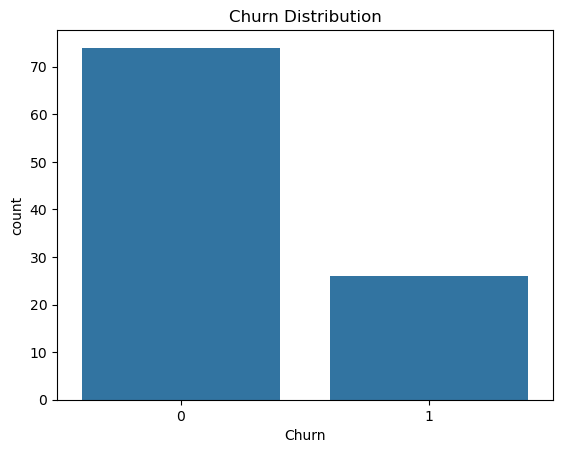

In [8]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


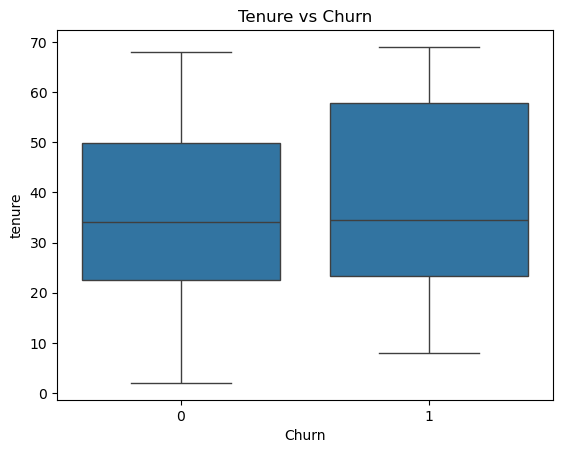

In [9]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


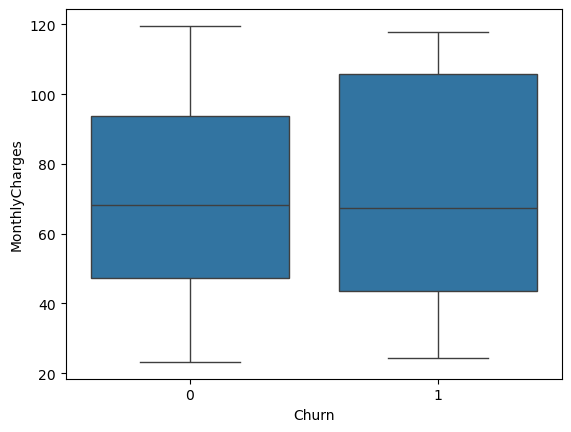

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


In [11]:
df = pd.get_dummies(df, drop_first=True)


In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.00      0.00      0.00         9

    accuracy                           0.50        20
   macro avg       0.26      0.45      0.33        20
weighted avg       0.29      0.50      0.37        20



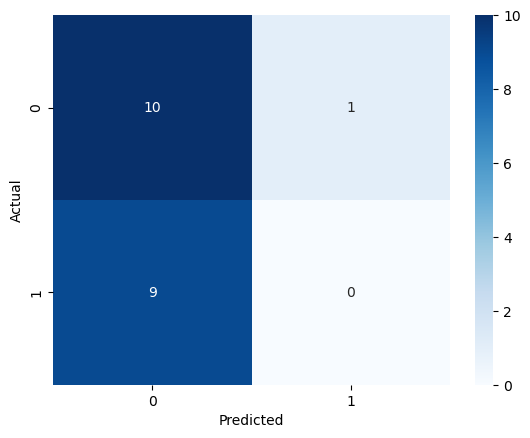

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])


0.36363636363636365

In [18]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


MonthlyCharges                 0.296309
tenure                         0.223663
TotalCharges                   0.220718
gender_Male                    0.054412
PhoneService_Yes               0.040453
InternetService_No             0.039221
Partner_Yes                    0.039196
InternetService_Fiber optic    0.031960
SeniorCitizen                  0.028362
Dependents_Yes                 0.025706
dtype: float64

In [19]:
import pickle

pickle.dump(rf, open("churn_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
